# Precise prompting for code
When using vision language models and large language models, it is crucial to provide all information we can in order to make the result best fitting. For example, if we know that algorithms of category "deep learning" are state-of-the-art in solving a particular challenge, we need to tell this to the LLM to get code that works best for this case.

Hint: In order to make this notebook work, you need to install [cellpose](), e.g. using this command:
```
pip install cellpose
```

In [1]:
import stackview
from skimage.data import human_mitosis
from bia_bob import bob

In [2]:
bob.initialize(model="gpt-4o-2024-08-06", vision_model="gpt-4o-2024-08-06")

First, we load again the example image.

StackViewNDArray([[ 8,  8,  8, ..., 63, 78, 75],
                  [ 8,  8,  7, ..., 67, 71, 71],
                  [ 9,  8,  8, ..., 53, 64, 66],
                  ...,
                  [ 8,  9,  8, ..., 17, 24, 59],
                  [ 8,  8,  8, ..., 17, 22, 55],
                  [ 8,  8,  8, ..., 16, 18, 38]], dtype=uint8)
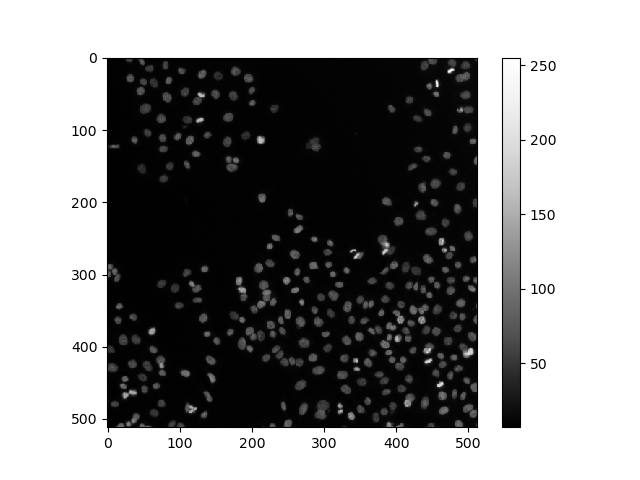
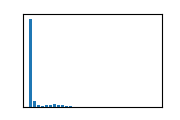

In [3]:
image = human_mitosis()

stackview.insight(image)

We pass this image to the vision language model to make it aware of the content of the image.

In [4]:
%%bob image
What's in this microscopy image? 
Answer in one short sentence.

The microscopy image shows numerous cell nuclei scattered across a dark background.

In [5]:
%%bob 
What deep-learning-based Python library could be used to segment the nuclei?

A deep-learning-based Python library that could be used to segment the nuclei is Cellpose.

To make sure the resulting image fits into your workflow, you should specify in what format you would like to receive the result. This might be crucial in case of algorithms such as CellPose, because it can produce outputs in multiple formats. Also specify how to visualize the result so that you can see if it makes sense.

In [6]:
%%bob
Please provide Python code for applying this algorithm to my image.
Make sure the result is a label image of integer type.
Also visualize the result using an animated curtain.

C:\Users\haase\miniconda3\envs\genai-gpu\Lib\site-packages\cellpose\resnet_torch.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, map_


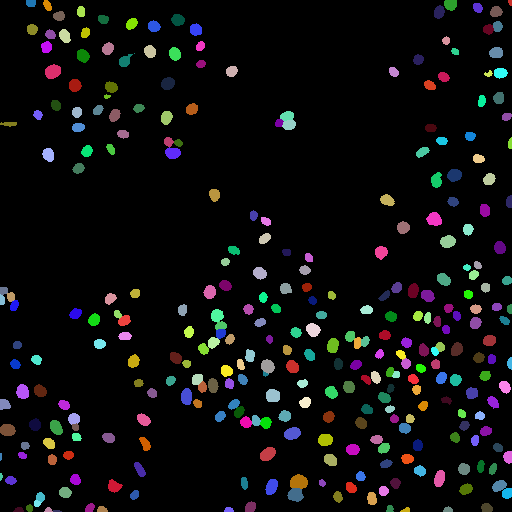

In [7]:
from cellpose import models
import numpy as np

# Load the pre-trained model
model = models.Cellpose(model_type='nuclei')

# Use the model for segmentation, assuming `image` is already loaded
masks, _, _, _ = model.eval(image, diameter=None, channels=[0,0], resample=True)

# Ensure the result is a label image of integer type
label_image = masks.astype(np.int32)

# Visualize using an animated curtain
stackview.animate_curtain(image, label_image)